In [ ]:
!pip install scikeras

Setting Randomness to Seed '42'

In [ ]:
import os
import random
import numpy as np
import tensorflow as tf

# 1. Set a global seed value
SEED = 42

# 2. Python built-in randomness
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)

# 3. NumPy
np.random.seed(SEED)

# 4. TensorFlow
tf.random.set_seed(SEED)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

url="https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"

diabetesdf = pd.read_csv(url)

X = diabetesdf.drop('Outcome', axis=1)
y = diabetesdf['Outcome']
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(X)
x_norm = pd.DataFrame(x_norm, columns=X.columns)

zero_counts = (x_norm == 0).sum()
print("Zero values in each column:\n\n", zero_counts)

null_counts = x_norm.isnull().sum()
print("Null (NaN) values in each column:\n\n", null_counts)

zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

for col in zero_cols:
    mean = x_norm[x_norm[col] != 0][col].mean()

    x_norm[col] = x_norm[col].replace(0, mean)

def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

df_outlier_removed=remove_outlier_IQR(x_norm)
df_outlier_removed=pd.DataFrame(df_outlier_removed)


def remove_outlier_IQR(X, y):
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1

    # Boolean mask for rows **without** outliers
    mask = ~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)

    # Apply mask to both X and y
    X_clean = X[mask]
    y_clean = y[mask]

    return X_clean, y_clean

# Call function
x_clean, y_clean = remove_outlier_IQR(x_norm, y)

Xt=x_clean

X_train, X_temp, y_train, y_temp = train_test_split(
    Xt, y_clean,
    test_size=0.30,
    stratify=y_clean,
    random_state=21
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=21
)


import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD

Zero values in each column:

 Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      1
Age                          63
dtype: int64
Null (NaN) values in each column:

 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

model2 = Sequential([
    Dense(64, activation='relu', input_shape=(8,)),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(4, activation='relu'),
    Dropout(0.05),
    Dense(1, activation='sigmoid')
])

model2.compile(optimizer=Adam(learning_rate=0.001),
               loss='binary_crossentropy',
               metrics=['accuracy'])

# Early stopping: stop if val_loss doesn't improve for 10 epochs, restore best weights
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    min_delta=1e-4,
    verbose=1
)

history = model2.fit(
    X_train, y_train,
    epochs=150,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.5828 - loss: 0.6904 - val_accuracy: 0.6484 - val_loss: 0.6757
Epoch 2/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6919 - loss: 0.6703 - val_accuracy: 0.6703 - val_loss: 0.6605
Epoch 3/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6501 - loss: 0.6640 - val_accuracy: 0.6703 - val_loss: 0.6491
Epoch 4/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6615 - loss: 0.6508 - val_accuracy: 0.6703 - val_loss: 0.6415
Epoch 5/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6552 - loss: 0.6537 - val_accuracy: 0.6703 - val_loss: 0.6353
Epoch 6/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6594 - loss: 0.6414 - val_accuracy: 0.6703 - val_loss: 0.6245
Epoch 7/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6582 - loss: 0.6365 - val_accuracy: 0.6593 - val_loss: 0.6145
Epoch 8/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6506 - loss: 0.6345 - val_accuracy: 0.6

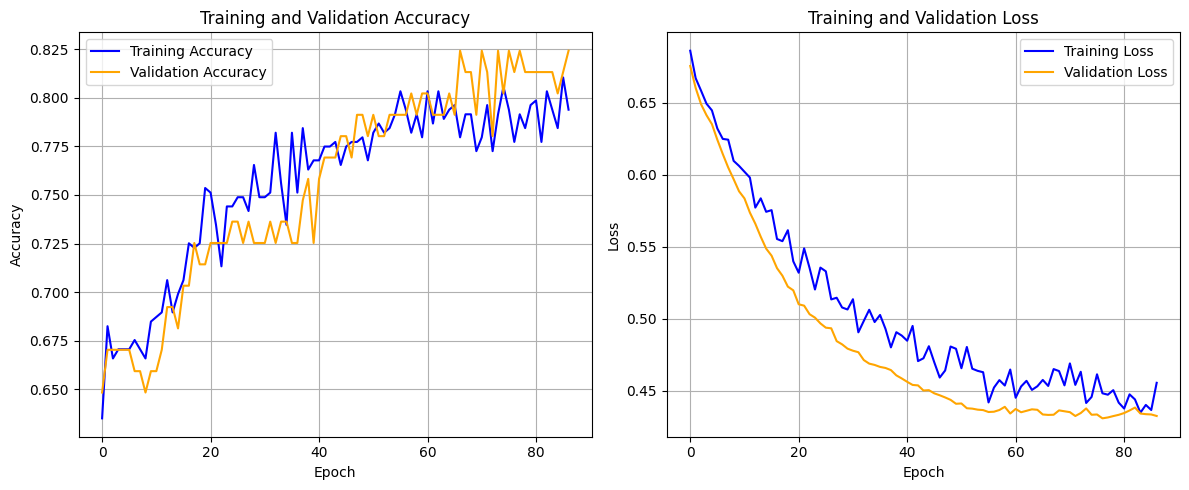

In [ ]:

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Adjust layout and display plots
plt.tight_layout()
plt.show()

In [ ]:
model2.save("diabetes_model.h5")
print("Model saved to diabetes_model.h5")

from tensorflow.keras.models import load_model

# Load the saved model
modelT = load_model("diabetes_model.h5")
print("Model loaded successfully.")

test_loss, test_accuracy = modelT.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

Model saved to diabetes_model.h5


Model loaded successfully.

Test Accuracy: 0.7582


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step 
Confusion Matrix:
 [[55  6]
 [16 14]]


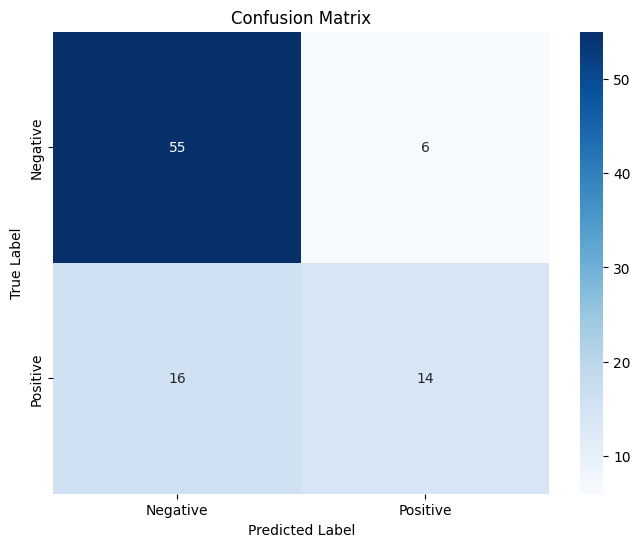


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83        61
           1       0.70      0.47      0.56        30

    accuracy                           0.76        91
   macro avg       0.74      0.68      0.70        91
weighted avg       0.75      0.76      0.74        91

ROC AUC: 0.8131147540983608


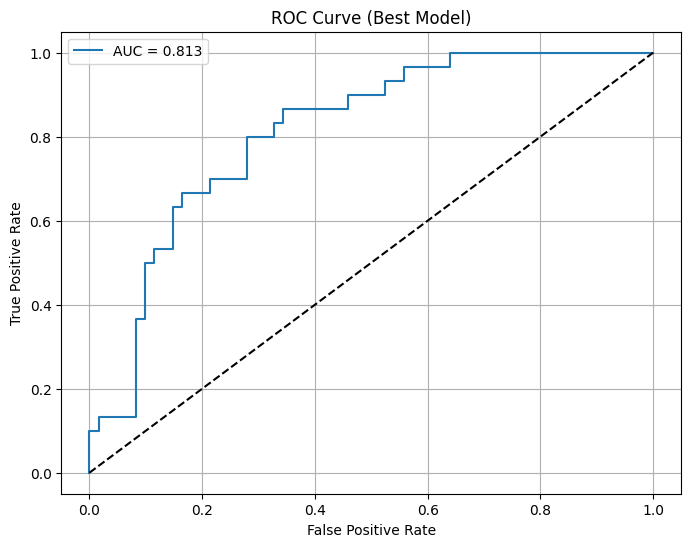

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns


# Predict on test set
y_pred_proba = modelT.predict(X_test).ravel()   # Get probabilities for positive class
y_pred = (y_pred_proba > 0.5).astype("int32")

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="AUC = {:.3f}".format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve (Best Model)")
plt.grid(True)
plt.show()